# TFIM 臨界を確認する

In [1]:
import qutip as qt
import numpy as np
from pathlib import Path
from datetime import datetime
import matplotlib as mpl
from matplotlib.ticker import MultipleLocator
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from functools import lru_cache
import requests
DISCORD_WEBHOOK_URL = "https://discord.com/api/webhooks/1439055708988375082/6iiXA8J_3Bn1RPWZ8XmPfmfSJp_PkGdaIzt495Ao2fbu_a09VnMJpxmrnSyfN4Wtyc7T"
def notify_discord(message: str):
    payload = {"content": message}
    try:
        r = requests.post(DISCORD_WEBHOOK_URL, json=payload, timeout=5)
        r.raise_for_status()
        print("✅ Discord 通知送信 OK")
    except Exception as e:
        print("⚠ Discord 通知に失敗:", e)

In [2]:
# ========= キャッシュ付きヘルパ =========

@lru_cache(maxsize=None)
def get_ops(N):
    """Nだけで決まる演算子たち（キャッシュ可能）"""
    sx, sz = qt.sigmax()/2, qt.sigmaz()/2
    I2 = qt.qeye(2)

    def op_at(i, op):
        return qt.tensor([op if k == i else I2 for k in range(N)])

    Sx = [op_at(i, sx) for i in range(N)]
    Sz = [op_at(i, sz) for i in range(N)]

    def H_exchange(i):
        return Sz[i] * Sz[i+1]

    Hex_unit = sum(H_exchange(i) for i in range(N-1))
    Hhx_unit      = sum(Sx[i] for i in range(N))

    left_sites = list(range(N//2))
    return Hex_unit, Hhx_unit, left_sites


def H_full(N, J, hx):
    """hx に依存する部分だけをここで組み立てる"""
    Hex_unit, Hhx_unit, _ = get_ops(N)
    return -J * Hex_unit - hx * Hhx_unit


def get_ground_state(N, J, hx):
    """基底状態を返す（キャッシュ不可）"""
    H = H_full(N, J, hx)
    _, psi0 = H.groundstate(sparse=True)
    return psi0


def get_SA(N, J, hx):
    """基底状態のエンタングルメント S_A を返す"""
    psi0 = get_ground_state(N, J, hx)
    _, _, left_sites = get_ops(N)
    rhoA = qt.ptrace(psi0, left_sites,)
    return qt.entropy_vn(rhoA, base=2)

# グラフ設定
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('default')
mpl.rcParams.update({
    "axes.labelsize": 18,   # 軸ラベル
    "xtick.labelsize": 16,  # 目盛り数字
    "ytick.labelsize": 16,
    "lines.linewidth": 2.2, # 線の太さ
    "axes.titlesize": 16,
})

def inward_ticks(ax, major_len=7, minor_len=4, width=1.2):
    ax.minorticks_on()
    ax.tick_params(which='both', direction='in', top=True, right=True, length=major_len, width=width)
    ax.tick_params(which='minor', length=minor_len, width=width)

markers = ['o', '^', 's', 'D', 'x']

OUTDIR = Path("../../charts/tfim2")
DATADIR = Path("../../data/tfim")

start simulation N = 6
hx is 0.0
hx is 0.05
hx is 0.1
hx is 0.15000000000000002
hx is 0.2
hx is 0.25
hx is 0.30000000000000004
hx is 0.35000000000000003
hx is 0.4
hx is 0.45
hx is 0.5
hx is 0.6
hx is 0.7
hx is 0.7999999999999999
hx is 0.8999999999999999
hx is 0.9999999999999999
hx is 1.0999999999999999
hx is 1.1999999999999997
hx is 1.2999999999999998
hx is 1.4
hx is 1.4999999999999998
hx is 1.5999999999999996
hx is 1.6999999999999997
hx is 1.7999999999999998
hx is 1.9
hx is 1.9999999999999996
EE is [0.38614446 0.6931476  0.69315139 0.69315296 0.69310374 0.69285728
 0.69209693 0.69025527 0.68644788 0.67946508 0.66788367 0.62600773
 0.55819451 0.47606014 0.39610085 0.32798799 0.27359883 0.23109702
 0.1978557  0.17157092 0.1504821  0.13330496 0.11911263 0.10723292
 0.09717251 0.08856414], when N = 6 and hx_list is [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.7  0.8
 0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.  ]
start simulation N = 12
hx is 0.0


/home/mizuta/mizuta/venv/lib/python3.12/site-packages/qutip/core/qobj.py:1810: UserWarning: Ground state may be degenerate.
  warnings.warn("Ground state may be degenerate.", UserWarning)


hx is 0.05
hx is 0.1
hx is 0.15000000000000002
hx is 0.2
hx is 0.25
hx is 0.30000000000000004
hx is 0.35000000000000003
hx is 0.4
hx is 0.45
hx is 0.5
hx is 0.6
hx is 0.7
hx is 0.7999999999999999
hx is 0.8999999999999999
hx is 0.9999999999999999
hx is 1.0999999999999999
hx is 1.1999999999999997
hx is 1.2999999999999998
hx is 1.4
hx is 1.4999999999999998
hx is 1.5999999999999996
hx is 1.6999999999999997
hx is 1.7999999999999998
hx is 1.9
hx is 1.9999999999999996
EE is [0.65458912 0.65758203 0.69314167 0.69317573 0.69323142 0.69334273
 0.69353758 0.69384845 0.69430553 0.69491297 0.69558497 0.6953041
 0.68171992 0.62492314 0.51370973 0.39651621 0.30887701 0.24899951
 0.20720183 0.17665124 0.15335971 0.13499852 0.12014433 0.10788104
 0.09759097 0.08884099], when N = 12 and hx_list is [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.6  0.7  0.8
 0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.  ]
start simulation N = 18
hx is 0.0
hx is 0.05
hx is 0.1
hx is 0.15000000000000

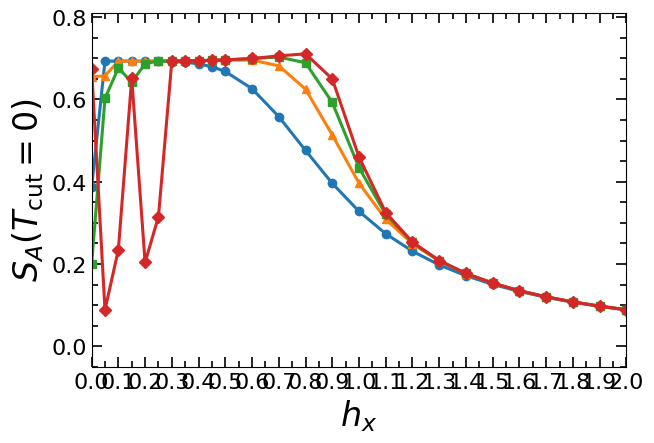

✅ Discord 通知送信 OK


In [3]:
# データ読み込み
# fname = DATADIR / "SA_vs_hx_N6-12-18-24-30.npz"  # 実際の名前に合わせて

# dat = np.load(fname)

# N_list  = dat["N_list"]   # shape (nN,)
# hx_list = dat["hx_list"]  # shape (nHx,)
# EE      = dat["EE"]       # shape (nN, nHx)

# 想定 : N_list = リスト hx = リスト 
# グラフ : (SA vs Tcut (len(N_list)本)) × len(hx_list)
N_list = [6, 12, 18, 24]
hx_list = np.concatenate([
    np.arange(0.0, 0.5 + 1e-9, 0.05),
    np.arange(0.5 + 0.1, 2.0 + 1e-9, 0.1)
])
nstamp = '-'.join(map(str, N_list))
J = 1.0
fig2, ax2 = plt.subplots(figsize=(6.9, 4.6))
max_SA2 = 0.0
EE_all = []
for j, N in enumerate(N_list):
    print(f"start simulation N = {N}")
    EE = []
    for hx in hx_list:
        EE.append(get_SA(N=N, J=J, hx=hx))
        print(f"hx is {hx}")
    EE = np.asarray(EE)
    EE_all.append(EE)
    max_SA2 = max(max_SA2, EE.max())
    mk = markers[j % len(markers)]
    ax2.plot(hx_list, EE, marker=mk, markersize=6.0, label=fr"$N={N:g}$", linewidth=2.2)
    print(f"EE is {EE}, when N = {N} and hx_list is {hx_list}")

EE_all = np.vstack(EE_all)
inward_ticks(ax2)
ax2.set_xlim(hx_list.min(), hx_list.max())
ax2.set_xlabel(r"$h_x$", fontsize=24)
ax2.set_ylim(-0.05, max_SA2+0.1)
ax2.set_ylabel(r"$S_A(T_{\rm cut}=0)$", fontsize=24)        
ax2.xaxis.set_major_locator(MultipleLocator(0.1))
ax2.xaxis.set_minor_locator(MultipleLocator(0.05))
# ax2.legend(frameon=False, title=fr"$h_x={hx:g}$ 
plt.show()
fig2.savefig(OUTDIR / f"SA_vs_hx_N{nstamp}_detailed.pdf", bbox_inches="tight", dpi=300)
np.savez(
    DATADIR / f"SA_vs_hx_N{nstamp}.npz",
    N_list=np.array(N_list),
    hx_list=hx_list,
    EE=EE_all,
)
notify_discord(message="TFIM_check_critical_lab is done")